In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
data = pd.read_csv("datasets/wine-labeled.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
# Part (b) Drop the red/white and quality columns to produce an 
#   unlabeled data set (so that you don’t know whether any given wine’s quality or cover).


data.drop(columns=["quality","type"],inplace=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [7]:
# Part (c) Using sklearn.preprocessing.MinMaxScaler scale all the data

s=MinMaxScaler()
X_scaled = s.fit_transform(data)
X_scaled[:1]

array([[0.29752066, 0.41333333, 0.        , 0.01993865, 0.11129568,
        0.03472222, 0.06451613, 0.20609215, 0.6124031 , 0.19101124,
        0.20289855]])

In [8]:
# Part (d) Convert the data into its first three principal components.

pca = PCA(n_components=3)
pca.fit(X_scaled)
X_scaled_pca = pca.fit_transform(X_scaled)
print("Shape:", X_scaled_pca.shape)
X_scaled_pca

Shape: (6497, 3)


array([[ 0.08853358,  0.39014333, -0.22240215],
       [ 0.05542598,  0.35022475, -0.05771987],
       [ 0.0703452 ,  0.33625361, -0.06429745],
       ...,
       [-0.1456587 , -0.0131764 ,  0.03587177],
       [ 0.31788425, -0.2371859 , -0.09602751],
       [ 0.18478845, -0.19062128, -0.02854532]])

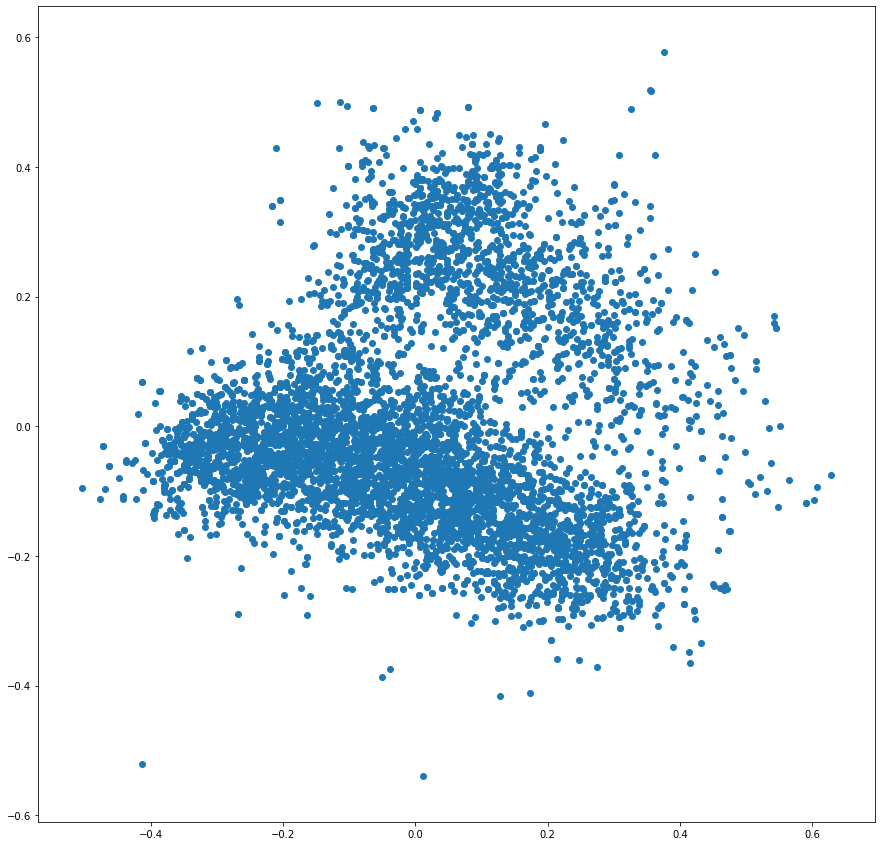

In [9]:
# Part (e) Plot the data onto its first two principal component planes and plot.

plt.scatter(X_scaled_pca[:,0], X_scaled_pca[:,1])
plt.gcf().set_size_inches(15,15)

In [10]:
# Part (f) Use KMeans and the silhouette score, what are the optimal numbers of clusters?

from sklearn.cluster import KMeans

scores = []
X_2 = np.array(X_scaled_pca[:,:2])
for number_of_clusters in range(2,10):
    model = KMeans(n_clusters=number_of_clusters)
    model.fit(X_2)
    S = silhouette_score(X_2, model.labels_)
    scores.append(S)
scores

[0.3676754971265525,
 0.48931390872113134,
 0.4352533747696896,
 0.43378688468167925,
 0.38851959284032894,
 0.3749710739124064,
 0.37341787713163926,
 0.3559934729662042]

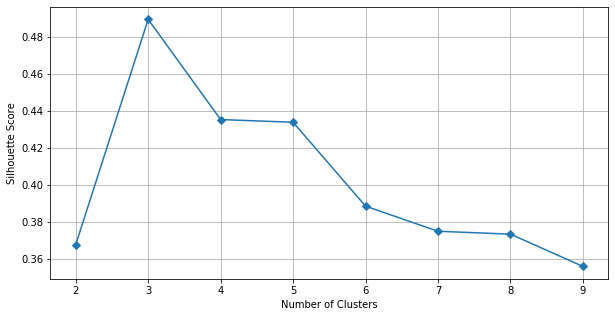

In [11]:
plt.plot(range(2,10),scores,marker="D")
plt.grid()
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(np.arange(2, 10, 1.0))
plt.gcf().set_size_inches(10,5)

# 3 clusters look the best

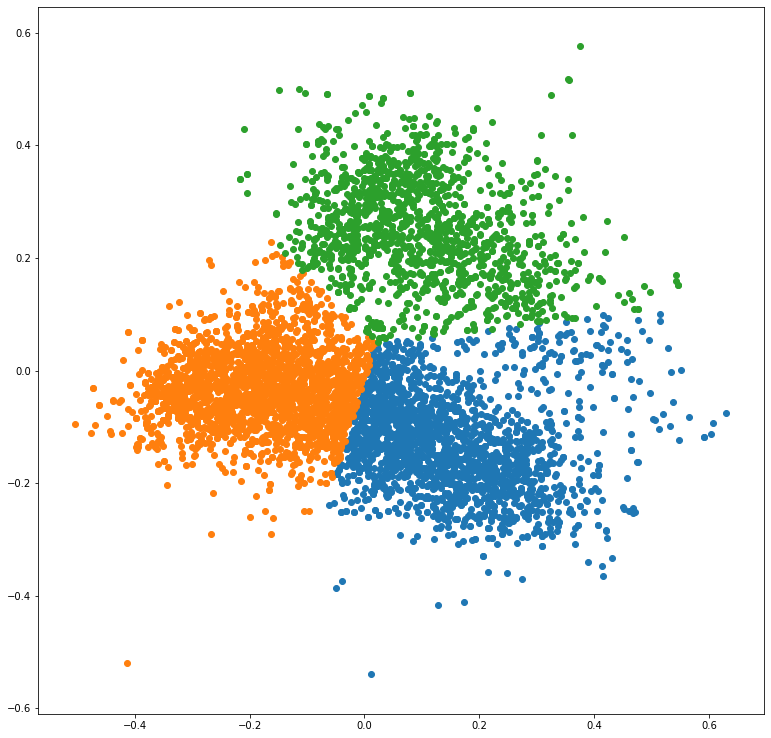

In [12]:
# Part (g) Plot the clusters in the first principal plane in different colors, e.g., red, blue, green, etc.

model = KMeans(n_clusters=3)
model.fit(X_2)
for j in range(3):
    p,q=X_2[model.labels_==j].T
    plt.scatter(p,q)
plt.gcf().set_size_inches(13,13)

In [13]:
df_pca = pd.DataFrame(X_scaled_pca) 
model = KMeans(n_clusters=4)
labels = model.fit(X_scaled_pca).labels_
df_pca['cluster'] = labels.reshape(-1,1)
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        6497 non-null   float64
 1   1        6497 non-null   float64
 2   2        6497 non-null   float64
 3   cluster  6497 non-null   int32  
dtypes: float64(3), int32(1)
memory usage: 177.8 KB


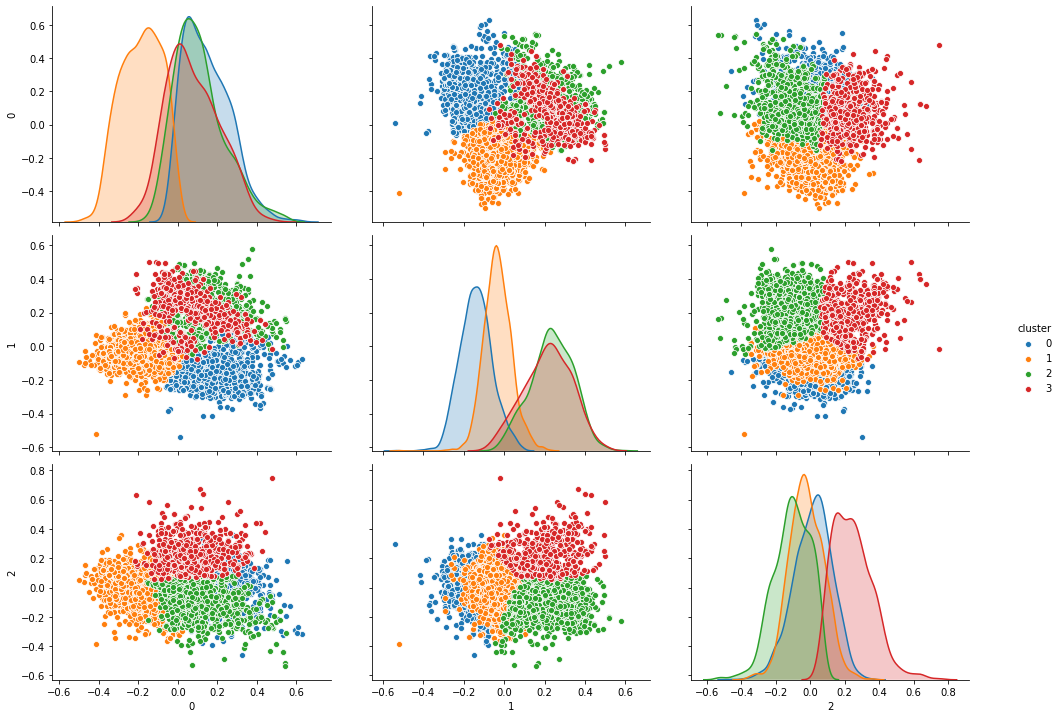

In [14]:
sns.pairplot(df_pca, hue='cluster')
plt.gcf().set_size_inches(15,10)
plt.show()